In [45]:
import numpy as np
from tensorflow import keras
from keras.constraints import maxnorm
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from keras.utils import np_utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

in the code cell below, we load the dataset from `cifar10` library which is imported from `keras.datasets` package



In [16]:
# @title we load the dataset from `cifar10` library which is imported from `keras.datasets` package

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [36]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [17]:
x_train.shape[1:]

(32, 32, 3)

In [18]:
# @title normalize the input from 0-255 to 0-1 by deviding by 255
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train = x_train / 255.0
x_test = x_test / 255.0

In [19]:
# @title one-hot encoding

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [20]:
num_class = y_train.shape[1] #10

In [21]:
num_class

10

# Building the model

In [8]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding=('same'), input_shape=x_train.shape[1:], activation='relu'))



model.add(Conv2D(64, (3,3), padding=('same'), activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(64, (3,3), padding=('same'), activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(128, (3,3), padding=('same'), activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(num_class, activation='softmax'))

In [9]:
# @title Compile model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         7

##Training Model

In [11]:
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=30, batch_size=64)

Epoch 1/30
782/782 [==============================] - 20s 9ms/step - loss: 1.4940 - accuracy: 0.4509 - val_loss: 1.1829 - val_accuracy: 0.5762
Epoch 2/30
782/782 [==============================] - 6s 8ms/step - loss: 0.9918 - accuracy: 0.6497 - val_loss: 0.9481 - val_accuracy: 0.6689
Epoch 3/30
782/782 [==============================] - 7s 9ms/step - loss: 0.7944 - accuracy: 0.7235 - val_loss: 0.8328 - val_accuracy: 0.7096
Epoch 4/30
782/782 [==============================] - 7s 9ms/step - loss: 0.6732 - accuracy: 0.7665 - val_loss: 0.8019 - val_accuracy: 0.7230
Epoch 5/30
782/782 [==============================] - 6s 8ms/step - loss: 0.5866 - accuracy: 0.7958 - val_loss: 0.7641 - val_accuracy: 0.7444
Epoch 6/30
782/782 [==============================] - 7s 8ms/step - loss: 0.5195 - accuracy: 0.8186 - val_loss: 0.7098 - val_accuracy: 0.7631
Epoch 7/30
782/782 [==============================] - 7s 8ms/step - loss: 0.4541 - accuracy: 0.8418 - val_loss: 0.7160 - val_accuracy: 0.7659
Epoch

In [12]:
for key,val in history.history.items():
  print(key)

loss
accuracy
val_loss
val_accuracy


In [13]:
import pandas as pd

<Axes: >

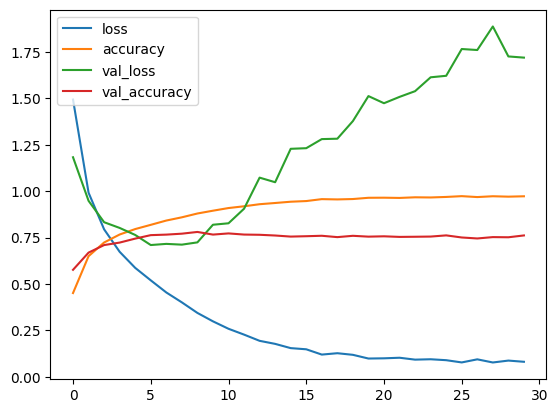

In [14]:
pd.DataFrame(history.history).plot()

According to the plot above, our model is **overfitted** on training data
Comparison between losses and accuracies would help us to determine it:

*   loss in train data (*blue line*) and loss of validation data (*green line*) tells us that our model in each iteration, has fewer losses than previous ones, instead in validation data we have more losses.
*   loss in train data accuracy (*orange line*) and accuracy in validation data (*red line*): you can obviously see that accuracy in validation data does not improve as much as in train data.

To fix this problem we can use a number of solutions

1.   First, we can use more data to train our model on that. But in this case, we don't have that option so we move on.
2.   Second thing is `Dropout` which means that in each iteration, our model will shut down some of the neurons randomly so others would have to learn more in order to get the correct answers.
3.  `BatchNormalization`



In [41]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding=('same'), input_shape=x_train.shape[1:], activation='relu'))

model.add(Dropout(0.2)) # added layer
model.add(BatchNormalization()) # added layer

model.add(Conv2D(64, (3,3), padding=('same'), activation='relu'))
model.add(MaxPool2D(2))

model.add(Dropout(0.2)) # added layer
model.add(BatchNormalization()) # added layer

model.add(Conv2D(64, (3,3), padding=('same'), activation='relu'))
model.add(MaxPool2D(2))

model.add(Dropout(0.2)) # added layer
model.add(BatchNormalization()) # added layer

model.add(Conv2D(128, (3,3), padding=('same'), activation='relu'))
model.add(MaxPool2D(2))

model.add(Dropout(0.2)) # added layer
model.add(BatchNormalization()) # added layer

model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(num_class, activation='softmax'))

In [42]:
# @title Compile model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 dropout_8 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 16, 16, 64)       

In [44]:
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=30, batch_size=64)

Epoch 1/30
782/782 [==============================] - 17s 17ms/step - loss: 1.5139 - accuracy: 0.4615 - val_loss: 1.1493 - val_accuracy: 0.5917
Epoch 2/30
782/782 [==============================] - 13s 16ms/step - loss: 1.0390 - accuracy: 0.6325 - val_loss: 0.9014 - val_accuracy: 0.6884
Epoch 3/30
782/782 [==============================] - 12s 15ms/step - loss: 0.8609 - accuracy: 0.6954 - val_loss: 0.8260 - val_accuracy: 0.7156
Epoch 4/30
782/782 [==============================] - 11s 15ms/step - loss: 0.7621 - accuracy: 0.7291 - val_loss: 0.7218 - val_accuracy: 0.7506
Epoch 5/30
782/782 [==============================] - 12s 15ms/step - loss: 0.6884 - accuracy: 0.7559 - val_loss: 0.7220 - val_accuracy: 0.7517
Epoch 6/30
782/782 [==============================] - 12s 16ms/step - loss: 0.6424 - accuracy: 0.7743 - val_loss: 0.6748 - val_accuracy: 0.7651
Epoch 7/30
782/782 [==============================] - 11s 14ms/step - loss: 0.5978 - accuracy: 0.7881 - val_loss: 0.6516 - val_accuracy:

In [30]:
import pandas as pd

<Axes: >

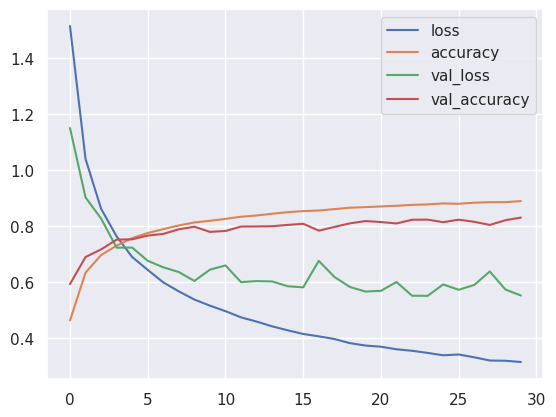

In [47]:
pd.DataFrame(history.history).plot()

<function matplotlib.pyplot.show(close=None, block=None)>

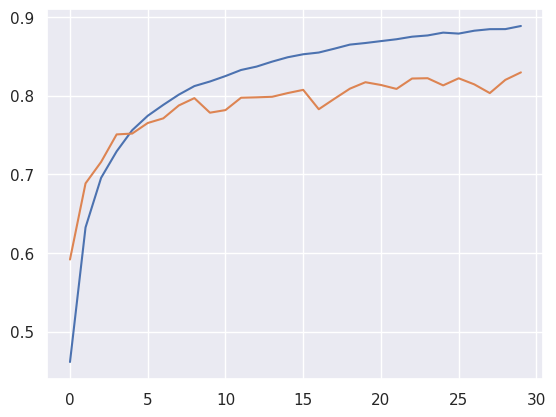

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show

In [49]:
# @title Save model's weights

model.save("CNN_sifar10.h5")

In [50]:
# @title Load Model

model2 = load_model("CNN_sifar10.h5")

In [35]:
# @title predict using loaded model

model2.predict(x_test[0:10])[0]

1/1 [==============================] - 0s 283ms/step


array([1.6131662e-06, 5.5858184e-08, 7.1570812e-06, 9.6715486e-01,
       1.6078344e-07, 3.0629341e-02, 2.1899804e-03, 6.1132819e-06,
       4.6270757e-06, 6.1752407e-06], dtype=float32)

In [37]:
labels[3]

'cat'

In [38]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [55]:
predictions = model.predict(x_test)
print(predictions.shape)
predictions = np.argmax(predictions, axis = 1)
print(predictions)

313/313 [==============================] - 1s 3ms/step
(10000, 10)
[3 8 8 ... 5 1 7]


In [57]:
y_test = np.argmax(y_test, axis = 1)

In [58]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

# **predict** test data and plot **Confusion Matrix**

313/313 [==============================] - 1s 2ms/step


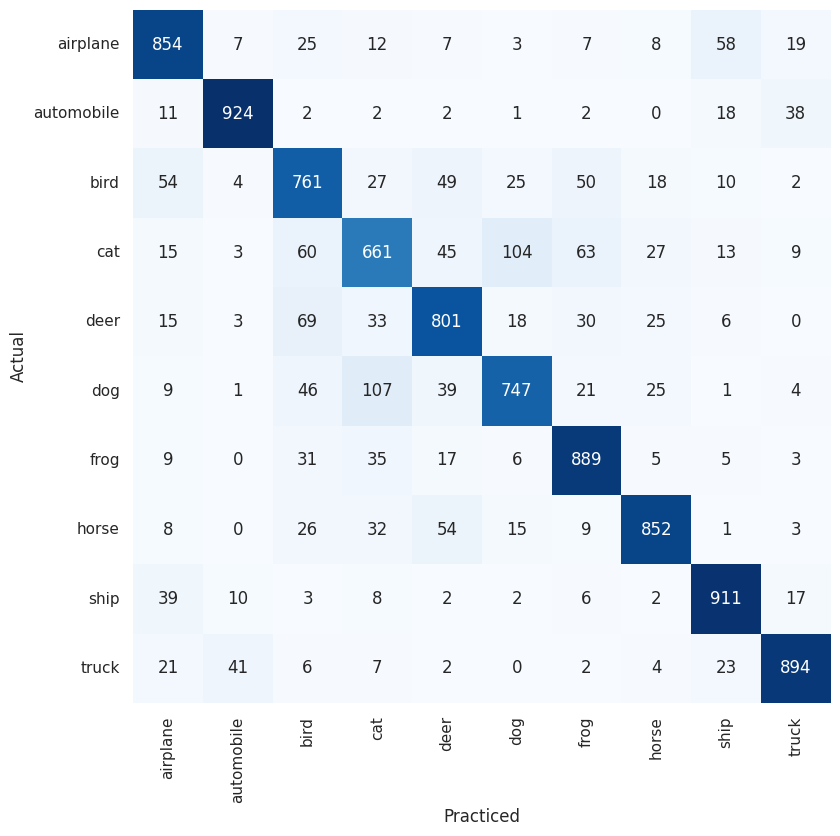

In [59]:
# Predict
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Practiced')
plt.ylabel('Actual')
plt.show()

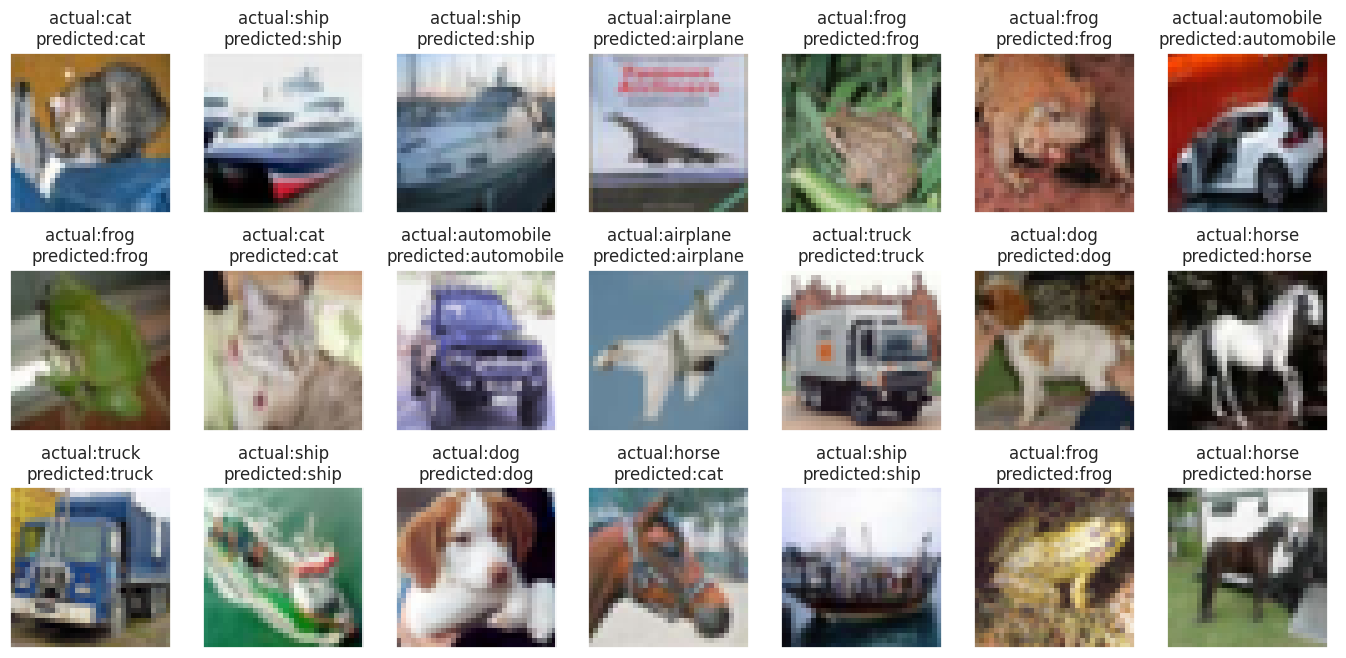

In [60]:
y_test = y_test.astype(int)
predictions = predictions.astype(int)

fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + labels[y_test[index]] + '\n' + 'predicted:' + labels[predictions[index]])
        axes[i,j].imshow(x_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()